<a href="https://colab.research.google.com/github/geoskimoto/SNOTEL_DoubleMassAnalysis/blob/main/SiteCharacterization12_28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats
# import scipy
# import statsmodels

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive/Projects/Work/SiteComparisons/SWE

/content/gdrive/My Drive/Projects/Work/SiteComparisons/SWE


In [5]:
ls

OR_SWE_diff_ways_to_extract_text.xlsx  OR_SWE.xlsx  WA_SWE.xlsx


In [6]:
# OR_Sites = pd.read_excel('OR SWE.xlsx')
# OR_Sites.sample(5)

## Import SWE Data from OR and WA Sites

In [7]:
WA_Sites = pd.read_excel('WA_SWE.xlsx')
# pd.to_datetime(WA_Sites['Date'])
WA_Sites.set_index('Date',inplace=True)
WA_Sites.sample(5)

,Alpine Meadows (908),Beaver Pass (990),Blewett Pass (352),Brown Top (1080),Buckinghorse (1107),Bumping Ridge (375),Bunchgrass Mdw (376),Burnt Mountain (942),Calamity (1109),Cayuse Pass (1085),Corral Pass (418),Cougar Mountain (420),Dungeness (943),Easy Pass (998),Elbow Lake (910),Fish Lake (478),Gold Axe Camp (1159),Gold Mountain (1256),Green Lake (502),Grouse Camp (507),Harts Pass (515),Huckleberry Creek (928),Indian Rock (1129),June Lake (553),Lone Pine (591),Lost Horse (599),Lyman Lake (606),Lynn Lake (1069),Marten Ridge (999),Meadows Pass (897),MF Nooksack (1011),Morse Lake (642),Moses Mtn (644),Mount Crag (648),Mount Gardner (898),Mowich (941),Mt. Tebo (1126),Muckamuck (1259),Olallie Meadows (672),Paradise (679),Park Creek Ridge (681),Pepper Creek (1104),Pigtail Peak (692),Pinto Rock (1263),Pope Ridge (699),Potato Hill (702),Quartz Peak (707),Rainy Pass (711)),Rex River (911),Salmon Meadows (728)),Sasse Ridge (734),Satus Pass (1231),Sawmill Ridge (1068),Sentinel Butte (1043),Sheep Canyon (748),Skate Creek (1257),Skookum Creek (912),Sourdough Gulch (985),Spencer Meadow (776),Spirit Lake (777),Spruce Springs (984),Stampede Pass (788),Stevens Pass (791),Surprise Lakes (804),Swamp Creek (975),Swift Creek (1012),Thunder Basin (817),Tinkham Creek (899),Touchet (824),Trinity (1171),Trough (832),Upper Wheeler (841),Waterhole (974),Wells Creek (909),White Pass E.S. (863)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-02-06,51.3,34.5,10.2,44.3,49.1,18.1,16.5,18.1,5.1,44.5,24.5,17.1,11.7,71.3,32.6,18.9,10.5,NaN,18.9,14.6,33.6,4.9,23.1,41.0,40.8,12.6,41.3,25.5,52.4,21.7,43.5,40.4,17.4,29.6,14.5,6.8,NaN,NaN,37.6,55.3,36.1,9.4,32.4,NaN,13.0,22.9,14.3,25.8,28.0,10.0,20.8,7.4,27.4,7.5,37.9,NaN,36.5,1.8,25.3,17.0,7.2,21.5,27.7,37.7,13.3,54.0,22.9,19.7,19.1,26.4,7.7,6.8,38.3,NaN,15.8
2010-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982-08-21,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0
2006-05-23,46.1,30.4,0.0,NaN,NaN,16.8,16.2,0.0,NaN,NaN,30.0,0.0,0.0,NaN,12.4,12.5,NaN,NaN,16.2,0.0,29.8,0.0,NaN,30.9,33.9,0.0,56.7,NaN,NaN,1.4,55.5,47.3,0.0,16.2,0.0,0.0,NaN,NaN,42.0,66.0,26.8,NaN,51.8,NaN,0.0,8.8,0.0,27.7,8.5,0.0,18.8,NaN,NaN,0.0,25.4,NaN,0.0,0.0,11.7,0.0,0.0,25.0,17.0,47.9,0.0,68.1,16.6,12.5,1.6,NaN,0.0,0.0,22.0,14.3,9.9
1980-12-10,NaN,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,7.3,NaN,NaN,NaN,NaN,5.0,NaN,3.2,NaN,NaN,NaN,NaN


In [8]:
OR_Sites = pd.read_excel('OR_SWE.xlsx')
# pd.to_datetime(OR_Sites['Date'])
OR_Sites.set_index('Date',inplace=True)
OR_Sites.sample(5)

,Aneroid Lake #2 (302),Annie Springs (1000),Arbuckle Mtn (304),Bear Grass (1166),Beaver Reservoir (331),Big Red Mountain,Bigelow Camp (343),Billie Creek Divide,Blazed Alder (351),Blue Mountain Spring,Bourne (361) Snow,Bowman Springs (362),Cascade Summit (388),Chemult Alternate (395),Clackamas Lake (398),Clear Lake (401),Cold Springs Camp,County Line (422),Crazyman Flat (1010),Daly Lake (434),Derr. (440) Snow,Diamond Lake (442),Eilertson Meadows (464),Emigrant Springs (470),Fish Creek (477),Fish Lk. (479),Fourmile Lake (483),Gerber Reservoir (945),Gold Center (494),Greenpoint (504) Snow,High Ridge (523),Hogg Pass (526),Holland Meadows (529),Howard Prairie (1158),Irish Taylor (545),Jump Off Joe (552),King Mountain (558),Lake Creek R.S. (563),Little Meadows (584),Lucky Strike (605),...,Marion Forks (614),Mckenzie (619),Milk Shakes (1079),Miller Woods (1084),Moss Springs (647),Mt Hood Test Site (651),Mt. Howard (653),Mud Ridge (655),New Crescent Lake (660),North Fork (666),Ochoco Meadows (671),Peavine Ridge (687),Quartz Mountain (706),Railroad Overpass (710),Red Hill (712),Roaring River (719),Rock Springs (721),Saddle Mountain (726),Salt Creek Falls (729),Santiam Jct. (733),Schneider Meadows (736),Seine Creek (743),Sevenmile Marsh (745),Silver Creek (756),Silvies (759) Snow,Smith Ridge (1167),Snow Mountain (767),South Fork Bull Run (925),Starr Ridge (789),Strawberry (794),Summer Rim (800),Summit Lake (801),Sun Pass (1078),Swan Lake Mtn (1077),Taylor Butte (810),Taylor Green (812),Three Creeks Meadow (815),Tipton (821),Toketee Airstrip (1044),Wolf Creek (873)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1993-01-22,17.1,NaN,18.4,NaN,7.9,27.9,22.4,22.6,27.8,16.3,14.8,6.5,29.5,14.5,16.0,11.8,29.8,5.1,NaN,24.2,16.1,21.1,9.5,13.5,24.3,15.5,26.7,NaN,11.2,24.0,21.3,35.2,30.7,NaN,31.6,14.4,18.2,12.5,26.8,7.4,...,13.5,33.8,NaN,NaN,17.0,38.4,8.0,21.7,18.2,14.7,11.8,15.3,13.7,2.6,32.0,26.4,7.1,16.8,25.3,19.4,25.6,9.5,28.7,14.3,17.7,NaN,13.0,NaN,7.3,10.9,16.2,37.5,NaN,NaN,12.2,18.5,15.1,9.8,NaN,14.4
2012-01-03,5.5,7.0,4.4,11.5,3.3,3.6,0.0,4.3,7.4,4.8,4.6,2.4,8.4,1.2,2.7,2.7,4.2,0.2,2.5,0.6,3.1,2.2,4.3,0.4,3.7,1.5,4.3,0.1,3.2,1.7,6.9,6.6,1.6,NaN,8.0,0.6,0.0,1.8,5.9,2.1,...,0.8,9.7,10.0,0.0,6.4,16.6,6.7,8.1,2.0,3.9,0.8,1.9,0.0,0.0,15.4,5.9,0.5,0.0,3.1,3.5,9.2,0.0,4.8,1.3,2.1,0.0,1.3,0.0,0.8,0.8,3.4,8.3,3.3,3.6,1.0,5.7,3.1,2.7,0.0,3.9
2013-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-11-30,0.4,1.6,0.5,NaN,0.5,0.3,0.0,0.8,0.0,0.3,0.3,0.1,0.1,0.0,0.1,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.2,NaN,2.6,0.0,0.0,0.0,0.2,0.0,...,0.0,2.2,1.0,0.0,1.4,0.5,2.7,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.6,1.0,0.0,0.0,0.7,0.0,0.0,0.0,0.8,0.0,0.6,NaN,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.5,0.7,0.2,0.8,0.0,0.0,1.1
2020-11-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge SWE sites into single dataframe in accordance to date

In [9]:
ORWA_Sites = pd.merge(OR_Sites,WA_Sites,left_index=True,right_index=True)
ORWA_Sites.sample(5)

,Aneroid Lake #2 (302),Annie Springs (1000),Arbuckle Mtn (304),Bear Grass (1166),Beaver Reservoir (331),Big Red Mountain,Bigelow Camp (343),Billie Creek Divide,Blazed Alder (351),Blue Mountain Spring,Bourne (361) Snow,Bowman Springs (362),Cascade Summit (388),Chemult Alternate (395),Clackamas Lake (398),Clear Lake (401),Cold Springs Camp,County Line (422),Crazyman Flat (1010),Daly Lake (434),Derr. (440) Snow,Diamond Lake (442),Eilertson Meadows (464),Emigrant Springs (470),Fish Creek (477),Fish Lk. (479),Fourmile Lake (483),Gerber Reservoir (945),Gold Center (494),Greenpoint (504) Snow,High Ridge (523),Hogg Pass (526),Holland Meadows (529),Howard Prairie (1158),Irish Taylor (545),Jump Off Joe (552),King Mountain (558),Lake Creek R.S. (563),Little Meadows (584),Lucky Strike (605),...,Mowich (941),Mt. Tebo (1126),Muckamuck (1259),Olallie Meadows (672),Paradise (679),Park Creek Ridge (681),Pepper Creek (1104),Pigtail Peak (692),Pinto Rock (1263),Pope Ridge (699),Potato Hill (702),Quartz Peak (707),Rainy Pass (711)),Rex River (911),Salmon Meadows (728)),Sasse Ridge (734),Satus Pass (1231),Sawmill Ridge (1068),Sentinel Butte (1043),Sheep Canyon (748),Skate Creek (1257),Skookum Creek (912),Sourdough Gulch (985),Spencer Meadow (776),Spirit Lake (777),Spruce Springs (984),Stampede Pass (788),Stevens Pass (791),Surprise Lakes (804),Swamp Creek (975),Swift Creek (1012),Thunder Basin (817),Tinkham Creek (899),Touchet (824),Trinity (1171),Trough (832),Upper Wheeler (841),Waterhole (974),Wells Creek (909),White Pass E.S. (863)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-06-14,13.9,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,8.4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,12.9,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,21.6,68.8,3.0,NaN,41.7,NaN,0.0,0.0,0.0,34.4,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.1,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0
2009-04-25,21.7,34.0,14.9,NaN,7.5,18.6,0.0,17.6,47.1,8.1,6.0,1.1,33.1,0.0,8.8,12.8,25.7,0.0,3.8,13.1,7.9,11.0,2.4,0.0,22.1,3.9,25.3,0.0,0.0,17.6,27.9,22.6,26.8,NaN,40.0,10.6,0.0,0.0,32.5,0.0,...,0.0,NaN,NaN,59.0,82.2,29.1,9.6,65.3,NaN,8.8,29.3,16.4,29.9,48.3,0.2,22.3,NaN,56.3,6.8,46.4,NaN,62.8,0.0,31.9,7.8,19.8,42.3,30.8,44.6,11.9,55.8,19.2,29.5,36.2,NaN,3.6,9.3,28.6,25.3,23.6
2017-01-09,7.7,21.1,9.8,31.8,5.8,14.7,11.1,14.1,23.3,8.6,9.3,5.7,18.7,7.5,10.0,9.1,15.3,3.9,8.5,13.0,9.2,10.9,7.3,8.5,10.9,7.0,12.8,1.8,7.0,10.5,14.9,17.3,16.4,4.8,20.2,9.8,6.1,8.1,22.8,6.1,...,2.9,NaN,2.7,21.6,32.5,17.4,8.7,21.3,23.3,7.1,15.1,8.6,12.2,18.9,3.6,11.6,6.4,21.0,4.9,26.5,17.6,27.3,5.1,19.1,7.5,7.2,16.4,15.2,24.9,6.4,38.2,12.8,13.0,16.2,11.6,6.1,4.6,24.0,14.9,11.1
1981-08-26,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2020-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


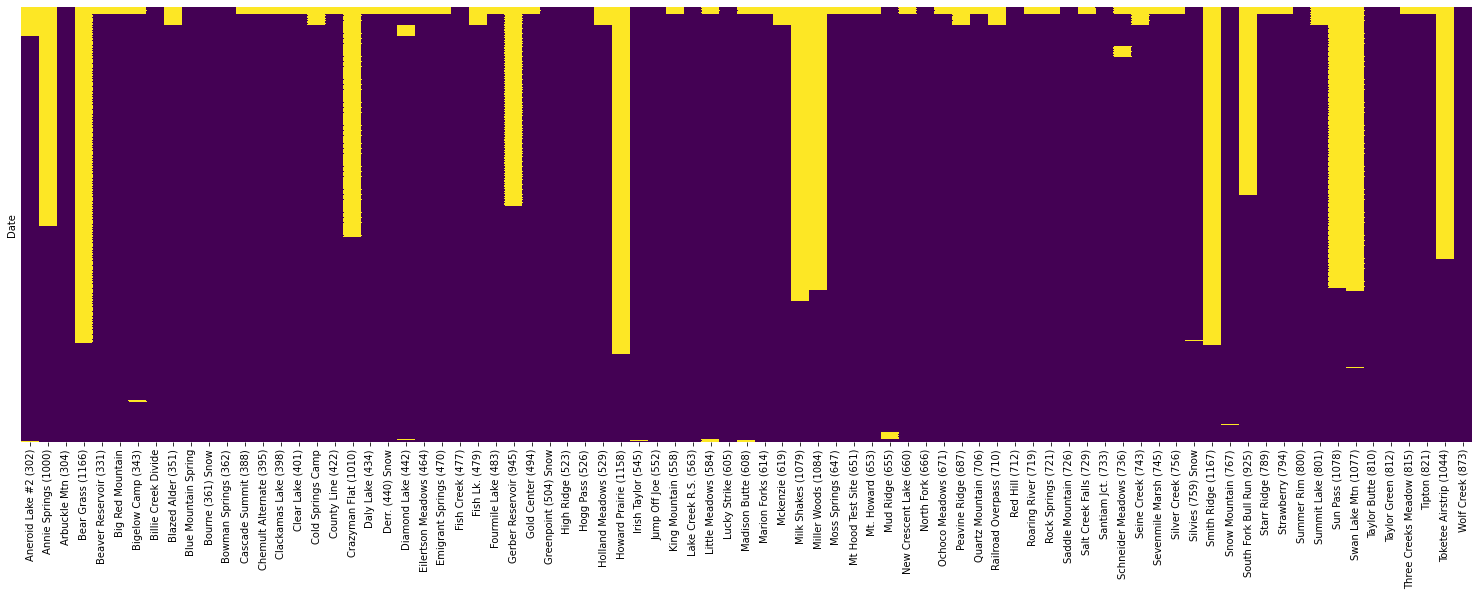

In [10]:
#Temp data
#Take a look at the missing values via a heatmap.  Yellow = nulls.
fig, ax = plt.subplots(1, figsize=(26,8))
sns.heatmap(OR_Sites.isnull(),yticklabels=False,cbar=False,cmap='viridis')

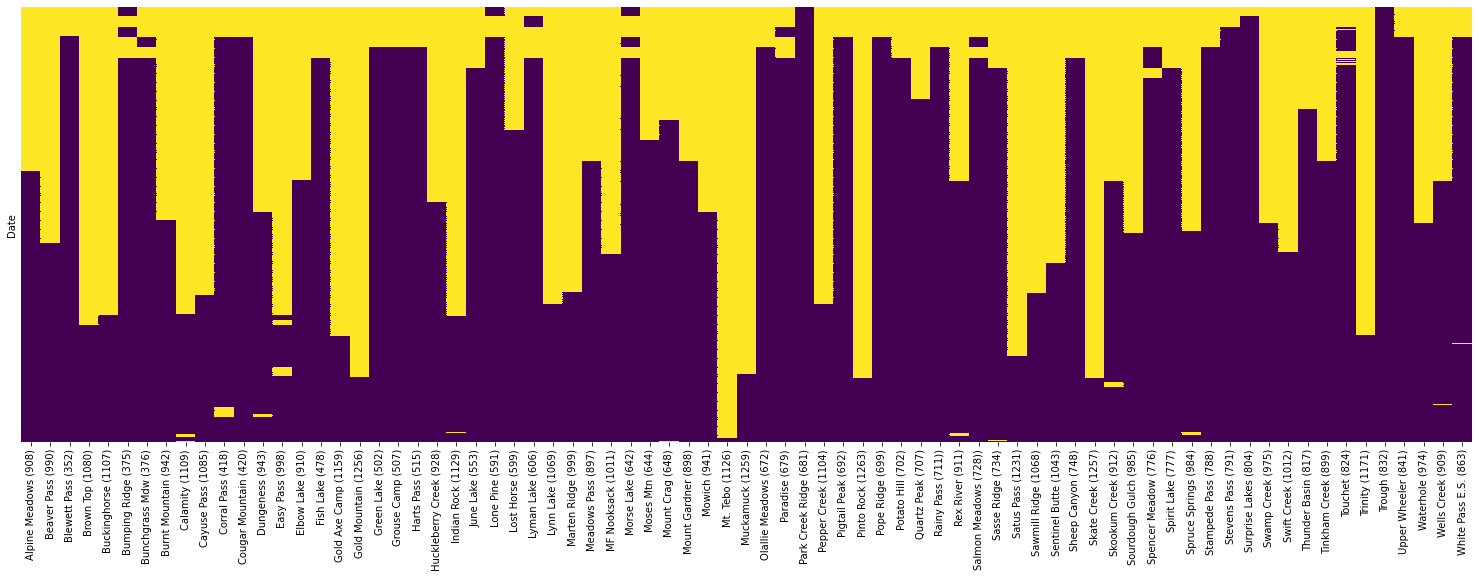

In [11]:
#Temp data
#Take a look at the missing values via a heatmap.  Yellow = nulls.
fig, ax = plt.subplots(1, figsize=(26,8))
sns.heatmap(WA_Sites.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
import missingno as msno

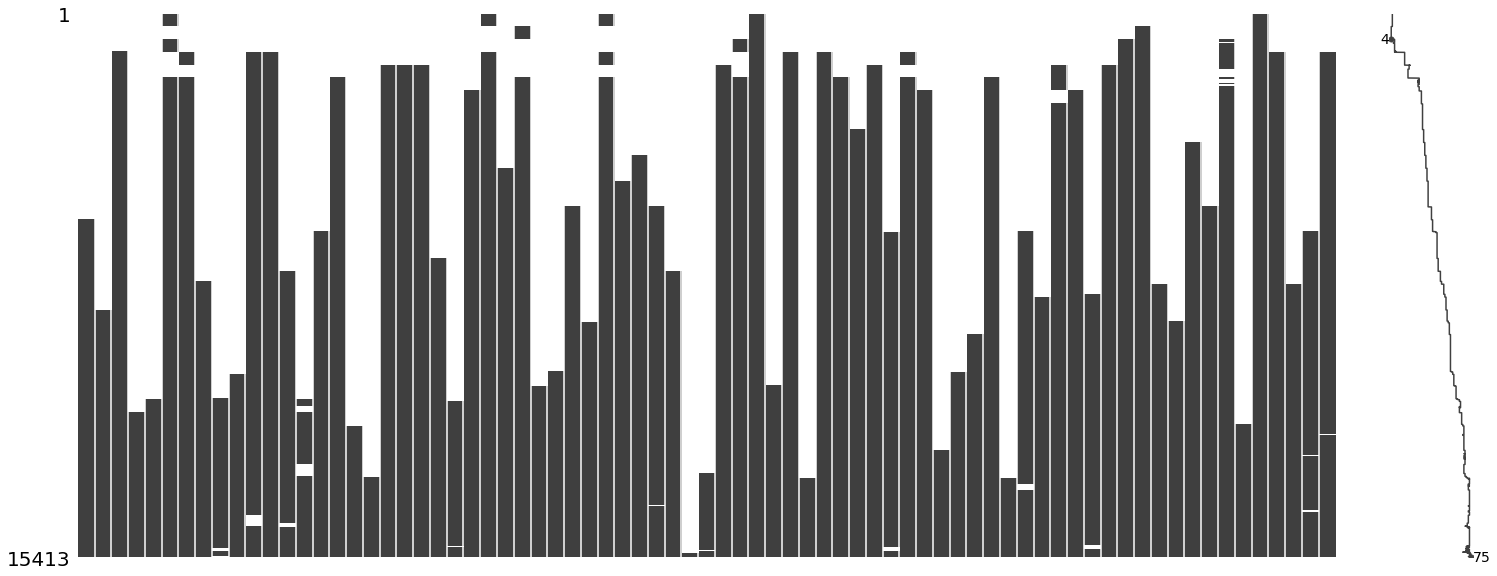

In [13]:
msno.matrix(WA_Sites)

In [14]:
!pip install sidetable
import sidetable

In [15]:
WA_Sites.stb.freq(['Alpine Meadows (908)'])

,Alpine Meadows (908),count,percent,cumulative_count,cumulative_percent
0,0.0,3584,37.458194,3584,37.458194
1,0.2,43,0.449415,3627,37.907609
2,0.1,40,0.418060,3667,38.325669
3,1.5,35,0.365803,3702,38.691472
4,0.3,33,0.344900,3735,39.036371
...,...,...,...,...,...
863,59.6,1,0.010452,9564,99.958194
864,53.2,1,0.010452,9565,99.968645
865,50.6,1,0.010452,9566,99.979097
866,45.5,1,0.010452,9567,99.989548


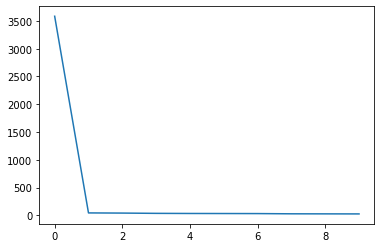

In [16]:
WA_Sites.stb.freq(['Alpine Meadows (908)'])['count'][:10].plot()

In [17]:
WA_Sites.stb.missing(['Alpine Meadows (908)'])

,missing,total,percent
Mt. Tebo (1126),15298,15413,99.253877
Pinto Rock (1263),13172,15413,85.460326
Skate Creek (1257),13170,15413,85.447350
Gold Mountain (1256),13149,15413,85.311101
Muckamuck (1259),13039,15413,84.597418
...,...,...,...
Bumping Ridge (375),1096,15413,7.110880
Blewett Pass (352),1065,15413,6.909752
Lone Pine (591),733,15413,4.755726
Stevens Pass (791),731,15413,4.742750


In [18]:
WA_Sites.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Mt. Tebo (1126),115,19,0.0,83,5.1,1
Mowich (941),8108,90,0.0,6109,8.6,1
Sourdough Gulch (985),7377,95,0.0,5502,10.0,1
Huckleberry Creek (928),8473,120,0.0,6126,7.1,1
Muckamuck (1259),2374,124,0.0,1493,9.8,1
...,...,...,...,...,...,...
Olallie Meadows (672),13950,902,0.0,4954,92.4,1
Lyman Lake (606),13953,921,0.0,4010,87.1,1
Swift Creek (1012),6693,976,0.0,2350,109.4,1
Easy Pass (998),3959,1069,0.0,1030,22.4,1


In [19]:
fig = go.Figure()

for i in WA_Sites.columns:
  WA = WA_Sites[WA_Sites[i] != 0].dropna()


  fig.add_trace(go.Box(y = WA[i], name = str(i)))

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,
    margin=dict(l=20, r=20, t=2, b=8),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()

for i in OR_Sites.columns:
  OR = OR_Sites[OR_Sites[str(i)] != 0].dropna()


  fig.add_trace(go.Box(y = OR[i], name = str(i)))

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,
    margin=dict(l=20, r=20, t=2, b=8),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [21]:
WA_Sites.describe()

,Alpine Meadows (908),Beaver Pass (990),Blewett Pass (352),Brown Top (1080),Buckinghorse (1107),Bumping Ridge (375),Bunchgrass Mdw (376),Burnt Mountain (942),Calamity (1109),Cayuse Pass (1085),Corral Pass (418),Cougar Mountain (420),Dungeness (943),Easy Pass (998),Elbow Lake (910),Fish Lake (478),Gold Axe Camp (1159),Gold Mountain (1256),Green Lake (502),Grouse Camp (507),Harts Pass (515),Huckleberry Creek (928),Indian Rock (1129),June Lake (553),Lone Pine (591),Lost Horse (599),Lyman Lake (606),Lynn Lake (1069),Marten Ridge (999),Meadows Pass (897),MF Nooksack (1011),Morse Lake (642),Moses Mtn (644),Mount Crag (648),Mount Gardner (898),Mowich (941),Mt. Tebo (1126),Muckamuck (1259),Olallie Meadows (672),Paradise (679),Park Creek Ridge (681),Pepper Creek (1104),Pigtail Peak (692),Pinto Rock (1263),Pope Ridge (699),Potato Hill (702),Quartz Peak (707),Rainy Pass (711)),Rex River (911),Salmon Meadows (728)),Sasse Ridge (734),Satus Pass (1231),Sawmill Ridge (1068),Sentinel Butte (1043),Sheep Canyon (748),Skate Creek (1257),Skookum Creek (912),Sourdough Gulch (985),Spencer Meadow (776),Spirit Lake (777),Spruce Springs (984),Stampede Pass (788),Stevens Pass (791),Surprise Lakes (804),Swamp Creek (975),Swift Creek (1012),Thunder Basin (817),Tinkham Creek (899),Touchet (824),Trinity (1171),Trough (832),Upper Wheeler (841),Waterhole (974),Wells Creek (909),White Pass E.S. (863)
count,9568.000000,7012.000000,14348.000000,4103.000000,4475.000000,14317.000000,13953.000000,7822.000000,4376.000000,5186.000000,13992.000000,14316.000000,7994.000000,3959.000000,9235.000000,13586.000000,3725.000000,2264.000000,13952.000000,13952.000000,13952.000000,8473.000000,4404.000000,13218.000000,14680.00000,11030.000000,13953.000000,4853.000000,5267.000000,9933.000000,6646.000000,14316.000000,10665.000000,11392.000000,9921.000000,8108.000000,115.000000,2374.000000,13950.000000,13952.000000,15413.000000,4865.000000,14317.000000,2241.000000,14315.000000,13585.000000,12126.000000,13952.000000,9095.000000,13952.000000,13205.000000,3032.00000,5252.000000,6316.000000,13583.000000,2243.000000,9060.000000,7377.000000,13587.000000,13216.000000,7356.000000,13952.000000,14682.000000,15043.000000,7736.000000,6693.000000,11759.00000,9934.000000,14276.000000,3768.000000,15413.000000,14313.000000,7743.000000,9178.000000,14292.000000
mean,19.383654,14.117613,4.158057,27.137022,21.744291,9.231319,9.935010,5.492585,1.102308,22.427092,13.868318,5.236805,2.761083,39.198762,12.020325,9.983247,2.852779,2.225883,8.189199,5.992015,17.755720,0.671993,7.835218,14.022545,14.15923,5.242339,25.300050,8.415743,21.545984,8.406957,23.727039,20.704443,4.673905,10.178248,4.613436,0.503268,1.129565,1.788332,19.579039,30.820721,15.617005,2.218767,21.482210,9.658768,5.206930,9.461870,6.543040,14.834461,11.191787,2.903190,10.852647,2.01128,13.175971,2.845234,13.300015,7.664155,10.491336,0.448855,9.933753,2.133800,3.855778,14.248072,13.002391,17.145337,5.101590,25.412177,10.88431,9.000242,10.063176,9.163907,3.227989,3.676141,14.586788,11.539627,7.685810
std,23.460777,16.183857,5.968230,26.630609,24.700433,11.642487,11.313102,8.563515,2.965907,24.906172,14.708125,8.295565,4.870160,38.611303,16.744094,12.446637,4.103709,3.594467,9.924819,7.842926,18.734632,1.682055,11.124304,19.569537,17.81325,7.509268,25.202785,12.653015,25.749265,12.169922,26.288811,22.674016,6.488623,13.237867,7.535503,1.356099,1.968701,2.909165,22.684140,30.540669,18.568764,4.869527,22.877251,13.497045,6.951442,11.764345,8.683055,16.205494,16.134079,4.097232,13.530607,3.48659,17.490129,3.883309,17.565662,10.653859,16.321867,1.435458,14.284742,4.724043,5.967938,17.292208,15.820722,20.288206,7.152139,29.508580,12.53456,12.053026,13.187792,12.089322,4.626211,4.923593,17.187358,14.250779,9.563567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,

In [22]:
# pd.DataFrame(WA_Sites.median()).T

In [23]:
OR_Sites.describe()

,Aneroid Lake #2 (302),Annie Springs (1000),Arbuckle Mtn (304),Bear Grass (1166),Beaver Reservoir (331),Big Red Mountain,Bigelow Camp (343),Billie Creek Divide,Blazed Alder (351),Blue Mountain Spring,Bourne (361) Snow,Bowman Springs (362),Cascade Summit (388),Chemult Alternate (395),Clackamas Lake (398),Clear Lake (401),Cold Springs Camp,County Line (422),Crazyman Flat (1010),Daly Lake (434),Derr. (440) Snow,Diamond Lake (442),Eilertson Meadows (464),Emigrant Springs (470),Fish Creek (477),Fish Lk. (479),Fourmile Lake (483),Gerber Reservoir (945),Gold Center (494),Greenpoint (504) Snow,High Ridge (523),Hogg Pass (526),Holland Meadows (529),Howard Prairie (1158),Irish Taylor (545),Jump Off Joe (552),King Mountain (558),Lake Creek R.S. (563),Little Meadows (584),Lucky Strike (605),...,Marion Forks (614),Mckenzie (619),Milk Shakes (1079),Miller Woods (1084),Moss Springs (647),Mt Hood Test Site (651),Mt. Howard (653),Mud Ridge (655),New Crescent Lake (660),North Fork (666),Ochoco Meadows (671),Peavine Ridge (687),Quartz Mountain (706),Railroad Overpass (710),Red Hill (712),Roaring River (719),Rock Springs (721),Saddle Mountain (726),Salt Creek Falls (729),Santiam Jct. (733),Schneider Meadows (736),Seine Creek (743),Sevenmile Marsh (745),Silver Creek (756),Silvies (759) Snow,Smith Ridge (1167),Snow Mountain (767),South Fork Bull Run (925),Starr Ridge (789),Strawberry (794),Summer Rim (800),Summit Lake (801),Sun Pass (1078),Swan Lake Mtn (1077),Taylor Butte (810),Taylor Green (812),Three Creeks Meadow (815),Tipton (821),Toketee Airstrip (1044),Wolf Creek (873)
count,13940.000000,7391.000000,14956.000000,3368.000000,14681.000000,14682.000000,14617.000000,14955.000000,14317.000000,14950.000000,14956.000000,14956.000000,14682.000000,14682.000000,14682.000000,14682.000000,14317.000000,14682.000000,7037.000000,14682.000000,14679.000000,14275.000000,14682.000000,14682.000000,14956.000000,14316.000000,14682.000000,8108.000000,14682.000000,14956.000000,14956.000000,14956.000000,14317.000000,2998.000000,14955.000000,14956.000000,14682.000000,14955.000000,14588.000000,14956.000000,...,14682.000000,14317.000000,4826.000000,5195.000000,14682.000000,14682.000000,14682.000000,14691.000000,14682.000000,14956.000000,14682.000000,14317.000000,14682.000000,14317.000000,14956.000000,14682.000000,14682.000000,14956.000000,14682.000000,14956.000000,14311.000000,14316.000000,14681.000000,14682.000000,14941.000000,3314.000000,14932.000000,8485.000000,14682.000000,14681.000000,14956.000000,14315.000000,5281.000000,5135.000000,14956.000000,14956.000000,14681.000000,14682.000000,6282.000000,14954.000000
mean,9.470861,13.491963,5.707455,13.258403,2.738138,9.058078,3.799843,6.439953,10.534986,4.817385,4.638072,2.066783,10.368165,2.157485,3.070222,3.580643,8.956869,0.956750,3.999758,4.302568,4.045603,4.065114,2.641575,1.433851,10.397974,2.980400,9.068049,0.332067,2.548924,4.867986,7.460504,10.870460,6.687546,1.113609,13.727182,3.127213,1.340955,2.862889,8.451069,2.130864,...,2.717048,14.717643,14.141691,0.011011,8.226754,23.489790,6.307969,8.292900,3.033579,6.021048,2.700817,3.676622,0.939450,0.128805,16.348596,9.211701,1.156450,1.564643,5.772531,4.229273,9.064007,0.387035,9.507070,2.662989,4.929442,1.197254,3.312235,1.622404,1.502323,1.238717,5.378952,15.739169,4.407366,6.381207,1.593187,5.968715,5.677536,3.573825,0.755030,4.774000
std,10.290978,16.492435,7.935238,18.112395,4.186305,12.090845,6.881622,9.155715,14.985399,6.701805,6.461878,3.385117,13.076054,3.729781,5.050827,5.729090,12.591741,1.852469,6.028386,8.361762,6.067807,6.722539,4.084340,2.948728,12.960559,4.853393,11.816926,0.819774,4.028157,7.730352,10.000858,14.692507,10.067380,2.311692,15.340735,5.870226,3.242912,4.618657,12.539574,3.505788,...,5.488874,17.840715,16.464127,0.130496,9.786303,25.367859,7.237097,11.271125,5.216105,10.208436,4.253242,6.195382,2.365277,0.556258,20.460637,12.704722,2.272285,4.131768,8.668786,7.346545,11.410196,1.344402,12.735913,4.574785,7.557087,3.039322,5.080677,4.3473

In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [43]:
from scipy import stats


def double_mass3(*args, month, time_freq, event_date):  #If you set month to a default, python sees it as a key-value argument which will break *args.
  
  

  if month == 0:
    site_list2 = [ORWA_Sites[args[i]].dropna().resample(time_freq).sum() for i in range(0, len(args))]

  elif month > 0 or month < 12:
    site_list1 = [site_list1.append(ORWA_Sites[site_list[i]].dropna().resample(time_freq).sum()) for i in range(0, len(args))]     
    site_list2 = [site_list2.append(site_list1[j][site_list1[j].index.month==month]) for j in range(0, len(args))]   
  
  else:
    print('select month (1-12)')

  x=site_list2[0]
  y=(np.add.reduce(site_list2))
  x1=site_list2[0].cumsum()
  y1=(np.add.reduce(site_list2)).cumsum()


  df = pd.DataFrame(x[len(x) - 2*len(x[x.index > event_date]):len(x)])
  df = np.split(df,2)

  ttest = stats.ttest_ind(df[0], df[1])
  statistic = ttest[0]
  pvalue = ttest[1]
  # print(statistic.astype(str),pvalue)
  # fvalue, pvalue = stats.f_oneway(a[0], a[1])  #For anova/more than just two groups.
  print('Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)')
  print('Calculated t test statistic: {:.2f}.  Calculated p value: {:.2f}'.format(statistic[0], pvalue[0]))
  if pvalue < 0.05:
    print('The p value obtained from T-test analysis is significant (p value < 0.05), and therefore, we reject the H0 as there is a significant difference between means.')
  else:
    print('The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.')


  customdata = pd.DataFrame(zip(site_list2[0].reset_index()['Date'], x1, y1, x, y)) #Can also use np.c_
  
    
  fig = go.Figure()
  
  fig.add_trace(go.Scatter(
      x=x1,
      y=y1,
      mode='lines',
      customdata=customdata,
      hovertemplate = '<b>Date: %{customdata[0]}</b><br>Site of Interest - Cumulative SWE (in): %{customdata[1]:.2f}</br>Comparison Site(s) - Cumulative SWE (in): %{customdata[2]:.2f}<br>Site of Interest - SWE (in): %{customdata[3]:.2f}</br>Comparison Site(s) - SWE (in): %{customdata[4]:.2f}',
      name = 'Site of interest: {}'.format(site_list2[0].name)
  ))

  fig.add_trace(go.Scatter(
      x=x1[x1.index==event_date],
      y=y1[y1.index==event_date],
      mode='markers',
      name='Date of event: {}'.format(event_date)

  ))

  fig.update_layout(
   height=900,
   width=900,
   title={
        'text': 'SWE Double Mass Curve',
        'y':.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Cumulative SWE at site of interest (%s)" % (site_list2[0].name),
    yaxis_title="Total Cumulative SWE of all Comparison Sites %s" % ([site_list2[i].name for i in range(0, len(site_list2))]),
        
        
        # site_list2[i].name, site_list2[2].name),
    xaxis2=dict(title='Date',
                overlaying='y',
                side='right')   
  )

  fig.show()
  # print(site for site.name in site_list2)


In [44]:
# double_mass('Corral Pass (418)', 'Huckleberry Creek (928)', 'Morse Lake (642)', month=0)

In [47]:
double_mass3('Corral Pass (418)', 'Huckleberry Creek (928)', 'Morse Lake (642)', month=0, time_freq = 'M', event_date='2017-06-26')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 1.42.  Calculated p value: 0.16
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [48]:
double_mass3('Diamond Lake (442)', 'Summit Lake (801)', 'Annie Springs (1000)', month=0, time_freq = 'W', event_date='2017-06-26')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Null hypothesis(H0: μ1=μ2). Alternative hypothesis(H1: μ1!=μ2.)
Calculated t test statistic: 1.76.  Calculated p value: 0.08
The p value obtained from T-test analysis is not significant (p value > 0.05), and therefore, we fail to reject the H0 as there is not a significant difference between means.


In [ ]:
double_mass('Moses Mtn (644)', 'Sentinel Butte (1043)',month=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
len(ORWA_Sites['Moses Mtn (644)'])

14956

In [ ]:
a = ORWA_Sites['Moses Mtn (644)'][0:7250]
b = ORWA_Sites['Moses Mtn (644)'][0:7250]

In [ ]:
a.corr(b)

1.0

## Boiler plate code

#### Prep'ing data for statistical tests

16.923788135973332 4.1356038837454366e-05
nan nan
count    651.000000
mean       3.875730
std        5.834064
min        0.000000
25%        0.000000
50%        0.000000
75%        6.000000
max       20.600000
Name: Moses Mtn (644), dtype: float64
count    651.000000
mean       2.743318
std        3.910439
min        0.000000
25%        0.000000
50%        0.000000
75%        5.700000
max       11.700000
Name: Moses Mtn (644), dtype: float64


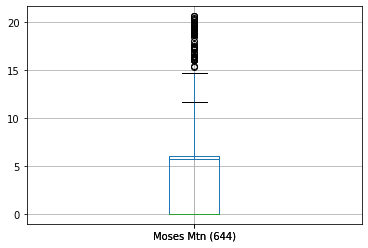

In [ ]:
# site_list2 = []
#     for i in range(0, len(site_list)):
#       site_list2.append(ORWA_Sites[site_list[i]].dropna())

event_date = '2019-03-01'

site_list = ('Moses Mtn (644)', 'Sentinel Butte (1043)','Annie Springs (1000)')
site_list2 = []
for i in range(0, len(site_list)):
  site_list2.append(ORWA_Sites[site_list[i]].dropna())

# site_list2
x=site_list2[0]
y=(np.add.reduce(site_list2))
x1=site_list2[0].cumsum()
y1=(np.add.reduce(site_list2)).cumsum()

df = x[len(x) - 2*len(x[x.index > event_date]):len(x)]
df1 = y[len(y) - 2*len(y[y.index > event_date]):len(y)]

df = np.split(df,2)
df1 = np.split(df1,2)

fvalue, pvalue = stats.f_oneway(df[0], df[1])
fvalue1, pvalue1 = stats.f_oneway(df1[0], df1[1])
print(fvalue, pvalue)
print(fvalue1, pvalue1)
print(df[0].describe())
pd.DataFrame(df[0]).boxplot()
print(df[1].describe())
pd.DataFrame(df[1]).boxplot()

#### Reducing for year and month scales

In [ ]:
def double_mass(*args, month, scale):  #If you set month to a default, python sees it as a key-value argument which won't make *args work.
  
  if scale = year:
    np.reduce



  site_list = args

  if month == 0:
    site_list2 = []
    for i in range(0, len(site_list)):
      site_list2.append(ORWA_Sites[site_list[i]].dropna())

  elif month > 0 or month < 12:
    site_list1 = []
    for i in range(0, len(site_list)):
      site_list1.append(ORWA_Sites[site_list[i]].dropna())
      
    site_list2 = []
    for j in range(0, len(site_list)):
      site_list2.append(site_list1[j][site_list1[j].index.month==month])
  
  else:
    print('select month (1-12)')


  x=site_list2[0].cumsum()
  y=(np.add.reduce(site_list2)).cumsum()

  # res = sm.OLS(y, x).fit().fittedvalues
  # print(res)

  customdata = pd.DataFrame(zip(site_list2[0].reset_index()['Date'], x, y)) #Can also use np.c_
  
    
  fig = go.Figure()
  
  fig.add_trace(go.Scatter(
      x=x,
      y=y,
      mode='lines',
      customdata=customdata,
      hovertemplate = 'Date: <b>%{customdata[0]}</b><br> x-Axis Accumulative SWE (in): %{customdata[1]}</br><br> y-Axis Accumulative SWE (in): %{customdata[2]}</br>',
      name = 'Site of interest: {}'.format(site_list2[0].name)
  ))

  fig.update_layout(
   height=900,
   width=900,
   title={
        'text': 'SWE Double Mass Analysis',
        'y':.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Accumulative SWE at site of interest (%s)" % (site_list2[0].name),
    yaxis_title="Total Accumulative SWE of all Comparison Sites %s" % ([site_list2[i].name for i in range(0, len(site_list2))]),
        
        
        # site_list2[i].name, site_list2[2].name),
    xaxis2=dict(title='Date',
                overlaying='y',
                side='right')   
  )

  fig.show()
  # print(site for site.name in site_list2)


In [ ]:
print(x[x.index==event_date])
print(y[y.index==event_date])

Date
2019-03-01    9.1
Name: Moses Mtn (644), dtype: float64
Date
2019-03-01    55.9
dtype: float64


In [ ]:
len(x1)

10665

In [ ]:
len(x[x.index>event_date])

651

In [ ]:
df = ORWA_Sites['Moses Mtn (644)'].iloc[:-3].dropna()


In [ ]:
df

Date
1991-10-01    0.0
1991-10-02    0.0
1991-10-03    0.0
1991-10-04    0.0
1991-10-05    0.0
             ... 
2020-12-04    3.2
2020-12-05    3.2
2020-12-06    3.2
2020-12-07    3.2
2020-12-08    3.2
Name: Moses Mtn (644), Length: 10662, dtype: float64

In [ ]:
len(df)

10662

In [ ]:
a = np.split(df, 2)

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(a[0], a[1])
print(fvalue, pvalue) #can't use cumulative in actual analysis as there will be obvious significant differences.

63.66289341281693 1.6278070798272638e-15


In [ ]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # perform multiple pairwise comparison (Tukey HSD)
# m_comp = pairwise_tukeyhsd(endog=a[1], groups=a[0], alpha=0.05)
# print(m_comp)

In [ ]:
# def bla(date, station of interest, comparison stations):

#   run corr bw x and y before date and after the date

#   run anova for x before the date and after the date
